In [ ]:
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn import metrics, set_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


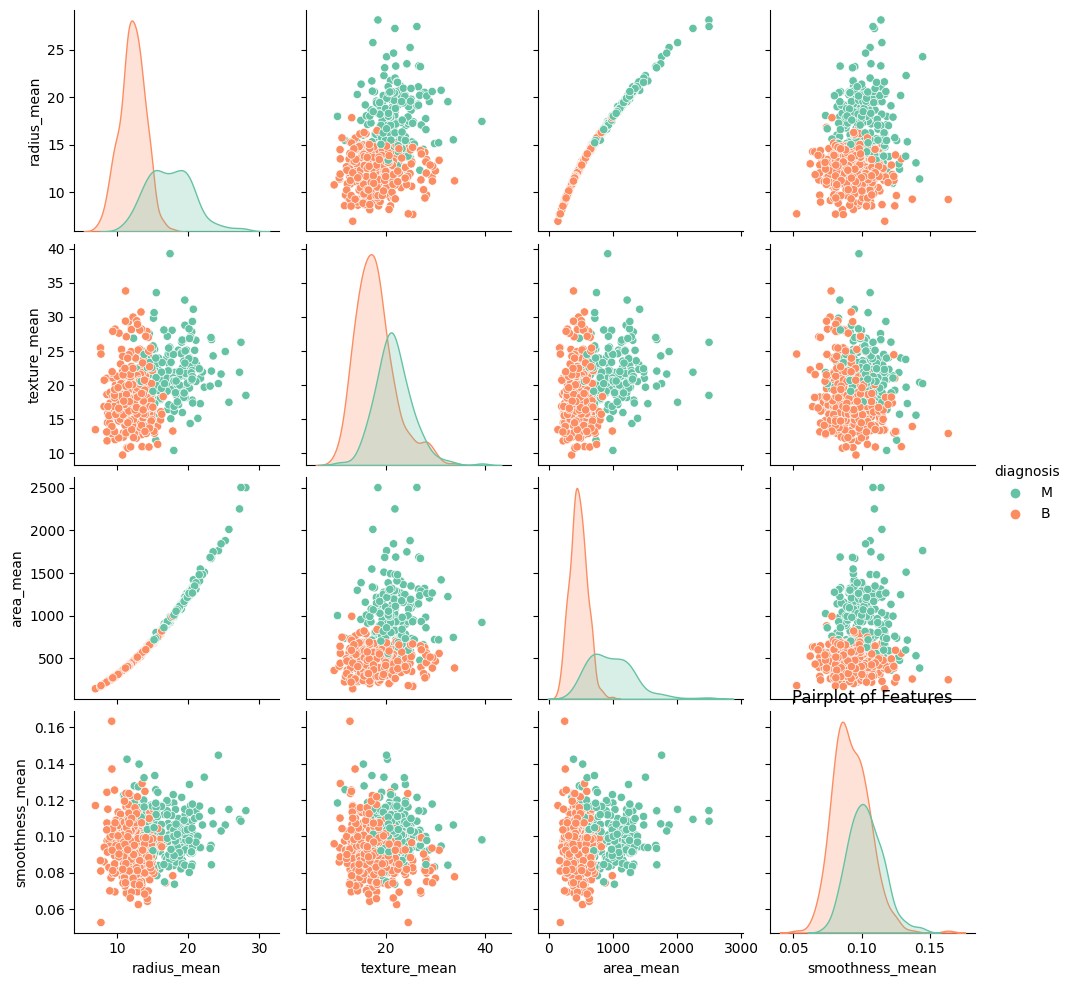

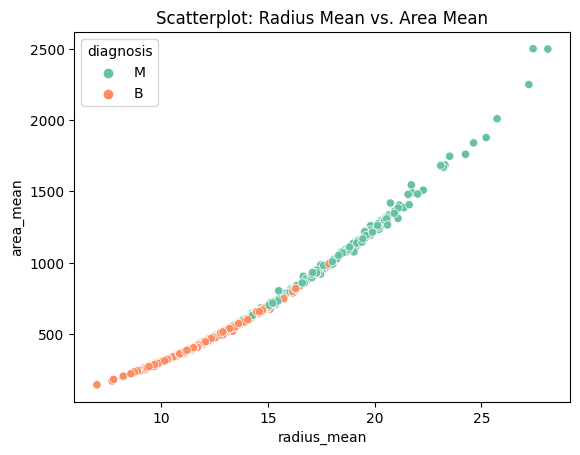

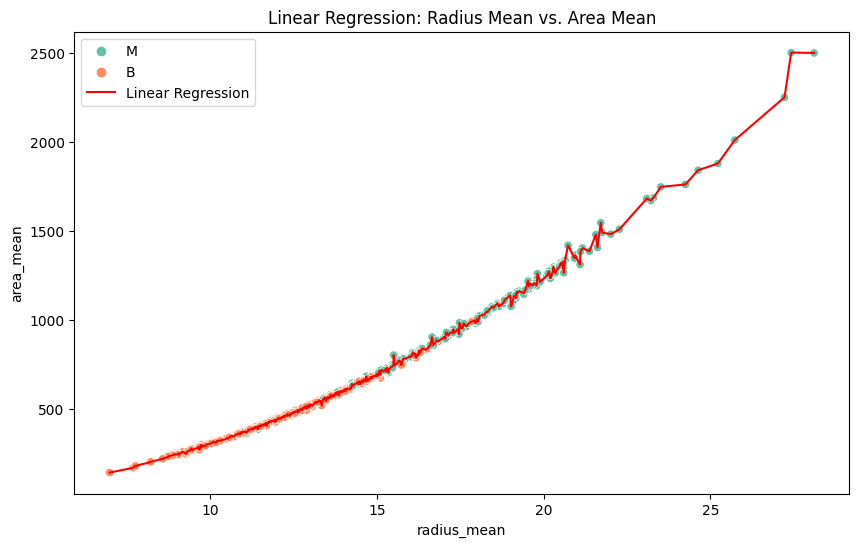

In [ ]:
# Load the dataset
data = pd.read_csv('//content/breast-cancer.csv')

# Pairplot
sns.pairplot(data, hue='diagnosis', palette='Set2', vars=['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean'])
plt.title("Pairplot of Features")
plt.show()

# Scatterplot
sns.scatterplot(data=data, x='radius_mean', y='area_mean', hue='diagnosis', palette='Set2')
plt.title("Scatterplot: Radius Mean vs. Area Mean")
plt.show()

# Linear Regression Line
X = data[['radius_mean']].values
y = data['area_mean'].values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='radius_mean', y='area_mean', hue='diagnosis', palette='Set2')
sns.lineplot(x=X.flatten(), y=y, color='red', label='Linear Regression')
plt.title("Linear Regression: Radius Mean vs. Area Mean")
plt.legend()
plt.show()

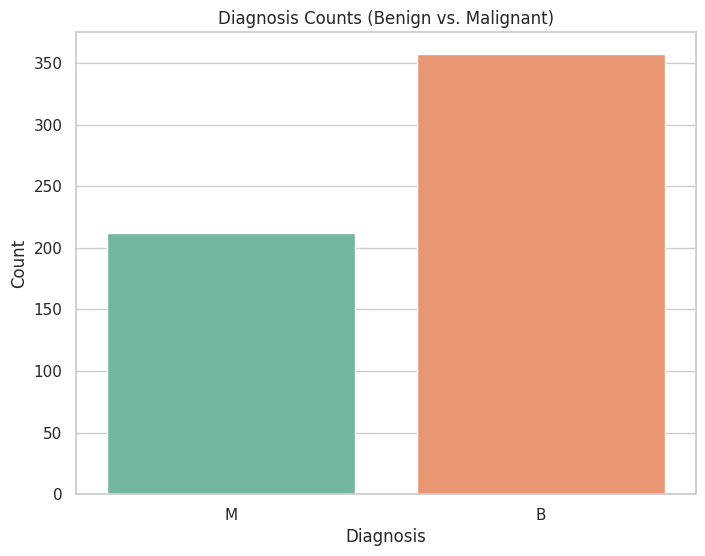

In [ ]:
# Create a bar plot of diagnosis counts
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=data, x="diagnosis", palette="Set2")
plt.title("Diagnosis Counts (Benign vs. Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


In [ ]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
X=data.drop(['radius_mean', 'perimeter_mean', 'area_mean'],axis=1).values
y=data['radius_mean'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

param_regressor = {
        'max_depth': np.arange(2, 11),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 5)
}

regressor = DecisionTreeRegressor(max_depth=2)
random_search = RandomizedSearchCV(regressor, param_regressor, n_iter=5, cv=5)
random_search.fit(X_train, y_train)
predictions = random_search.predict(X_test)
print("Prediciones DTR: ", predictions)

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(random_search, X_train, y_train, cv=k_fold)
print(scores)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Predicciones LR: ", y_pred)

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(scores)

#SIN NINGUN AREA NI PERIMETRO

X=data.drop(['radius_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
random_search.fit(X_train, y_train)
predictions = random_search.predict(X_test)
print("Prediciones DTR: ", predictions)

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(random_search, X_train, y_train, cv=k_fold)
print("Scores DecisionTreeRegresor: ", scores)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Prediciones LR: ", y_pred)


k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(reg, X_train, y_train, cv=k_fold)
print("Scores LinearRegression: ", scores)

Prediciones DTR:  [13.62510638 19.873      16.07470588 11.92020833 11.18941176 24.87
 27.58333333 17.52708333 12.65321429 13.62510638 12.65321429 17.52708333
 14.93411765 14.93411765 12.65321429 17.52708333 13.62510638 10.14175
  8.85       19.873      14.93411765 12.65321429 19.873      10.14175
 11.18941176 12.65321429 12.65321429 10.14175    12.65321429 19.873
 11.18941176 11.92020833 10.14175    14.93411765 10.14175    11.92020833
 17.52708333 11.92020833 18.73130435 14.14346154 10.14175    16.07470588
 11.18941176 11.92020833 11.18941176 11.92020833 10.14175    10.14175
 11.92020833 12.65321429 18.73130435 18.73130435 12.65321429 12.65321429
 11.92020833 13.62510638 10.14175    27.58333333 13.62510638 11.18941176
 12.65321429 19.873      19.873      13.62510638 11.92020833 12.65321429
 16.07470588 19.873      11.18941176 12.65321429 14.14346154 17.52708333
 13.62510638 14.14346154  8.85       13.62510638 13.62510638 14.93411765
 11.18941176 11.92020833 17.52708333 11.18941176 14.1

Los resultados de cada arbol de decision se pueden evaluar mirando los gráficos de dispersión de predicciones vs los de los valores reales.
Para elegir el mejor arbol se comparan los margenes de error entre modelos, y usamos la validación cruzada para obtener una evaluación mas fuerte.
Los modelos de regresión lineal dan resultados que indican la relación lineal entre las características y la variable que se quiere predecir.

In [ ]:
X=data.drop('diagnosis',axis=1).values
y=data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

param_model = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

model = LogisticRegression(random_state=42, max_iter = 10000)
model_LogisticRegression = RandomizedSearchCV(model, param_model, n_iter=1, cv=5)
model_LogisticRegression.fit(X_train, y_train)
y_pred = model_LogisticRegression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(model_LogisticRegression, X_train, y_train, cv=k_fold)
print("Scores LogisticRegression: ", scores)

#----------------------------------------------------------------------
param_clf = {
    'max_depth': randint(5, 21),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

clf = DecisionTreeClassifier()
clf_hiperparametros = RandomizedSearchCV(clf, param_clf, n_iter=1, cv=5)
clf_hiperparametros.fit(X_train, y_train)
y_pred = clf_hiperparametros.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(clf_hiperparametros, X_train, y_train, cv=k_fold)
print("Scores DecisionTreeClassifier: ", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Precisión del modelo: 0.631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Scores LogisticRegression:  [0.6875     0.35       0.6125     0.53164557 0.64556962]
Precisión del modelo: 0.9415204678362573
Scores DecisionTreeClassifier:  [0.95       0.875      0.9        0.92405063 0.92405063]


Se evalúa la precisión del modelo utilizando el conjunto de prueba (X_test, y_test) y con eso se mide la precisión del modelo sobre el total de predicciones.
Además, se utiliza la validación cruzada con k-fold para obtener una evaluación más fuerte del rendimiento del modelo. La validación cruzada divide los datos de entrenamiento en un numero "k" de conjuntos y entrena y evalúa el modelo "k" veces.
Se prueban diferentes configuraciones de hiperparámetros (como la profundidad máxima del árbol o el criterio de división) y seleccionan aquellos que devuelven el mejor rendimiento.
Para comparar los resultados de los modelos de regresión lineal y de árbol de decisión se evalúa la precisión de ambos modelos para determinar cuál tiene un mejor rendimiento en términos de la clasificación correcta de las muestras en el conjunto de prueba.

Validación cruzada de k-fold:
Ventajas: Ampliamente utilizado y proporciona una estimación robusta. Aprovecha al máximo los datos al dividirlos en k subconjuntos, realizando k iteraciones de entrenamiento y prueba.
Desventajas: Puede ser costoso computacionalmente.

Validación cruzada leave-one-out (LOOCV):
Ventajas: Utiliza todos los datos excepto uno para entrenar, lo que resulta en una estimación menos sesgada de la capacidad de generalización. Es útil en conjuntos pequeños.
Desventajas: Costoso, especialmente en conjuntos de datos grandes, ya que implica una gran cantidad de iteraciones, y es sensible al ruido.

Validación cruzada estratificada:
Ventajas: Útil en clasificación con clases desequilibradas. Garantiza que cada pliegue de entrenamiento y prueba tenga la misma proporción de clases que el conjunto de datos original.
Desventajas: No es relevante en problemas balanceados.

Validación cruzada por grupos:
Ventajas: Útil cuando tienes grupos de datos relacionados y queres asegurarte de que los datos de un grupo no se mezclen entre los cortes de entrenamiento y prueba.
Desventajas: Requiere información adicional y puede ser complejo de implementar.

In [ ]:
X=data.drop('diagnosis',axis=1).values
y=data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


param_rf = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20)}

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_search_rf = RandomizedSearchCV(random_forest, param_rf, n_iter=5, cv=5)
rand_search_rf.fit(X_train, y_train)
y_pred = rand_search_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Random Forest: {:.2f}%".format(accuracy * 100))

k = 5
k_fold = KFold(n_splits=k)
scores = cross_val_score(rand_search_rf, X_train, y_train, cv=k_fold)
print(scores)

Precisión del Random Forest: 97.66%
[0.9625     0.95       0.9875     0.93670886 0.93670886]


Conclusion:
- Usar graficos que muestren los datos ayuda a interpretarlos mejor y puede agilizar el desarrollo de los modelos. En otras palabras, entender el dataset puede facilitar el proceso.
- Dependiendo de que sea el dataset, el tipo de modelo que elijas va a cambiar mucho.
- Utilizar ciertos metodos que re-usen los datos para evaluar y entrenar el modelo lo mas posible puede llegar a hacer la diferencia entre un modelo mediocre o uno muy preciso.
- Un alto nivel de precision no siempre es bueno, puede significar data leakage. Por ejemplo, predecir la edad de alguien usando su fecha de nacimiento como parametro.
- Tener muchos datos siempre va a ayudar a tener mas precision. En caso de no tener los suficientes, se pueden producir mas artificialmente. (No lo tuvimos que usar para este TP, pero lo aprendimos como una consecuencia de la realizacion del mismo).